# Group 7 Project: Latent Space Cluster Analysis
<i>Patrick Kay, Kyle Shannon, Ean Vandergraaf</i>

<b>Suggested Activities for Analysis:</b>
* Get a feel for the data by looking at specific frames and the closest other points.
* Clean your data, perhaps moving the beginning and end content of credits.
* Develop hunches and hypotheses about different characters, visual themes, etc.
* Watch or rewatch the movie and/or scour the internet for critical analysis to develop theories.
* Use clustering techniques, such as k-means, to break up scenes or themes
* Develop algorithms or methods for breaking things down scene by scene.
* Consider aggregating scenes as averages.
* Reduce the number of dimensions to explore relationships among.
* Plot timelines that have additional analysis or selective content.
* Interpret the data and analysis through group discussions.

  
<b>Goal to answering these questions:</b>
* <b>Questions about characters</b>: Who are the main characters? When are they featured or absent?
* <b>Semantic themes and motifs</b>: Are there broader themes you can find that repeat across scenes?
* <b>Outliers</b>: Are there scenes that differ greatly compared to most of the rest of the film?
* <b>Clusters</b>: How would you characterize the visual content of the film? Answering this question will likely require both clustering (e.g., k-means, t-SNE) and using your own interpretation on the results of the clustering to make sense of it.
cussions. 
it.

## TODO: Organize the Data

### 1. Take out opening credits

In [3]:
import re
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from IPython.display import Image, display

import json
moive_embeddings = json.load(open("honey_i_shrunk_the_kids_movie_embeddings_1_second.json"))

image_root = 'thumbnails_folder2large/'

embeddings = np.array([vector['embedding'] for vector in moive_embeddings[163:5386]])
#sorted_indexes = np.argsort(embeddings)
print(len(embeddings))
#print(sorted_indexes)

5223


In [4]:
print(embeddings)

[[ 0.53770572  0.73687452  0.07081793 ... -0.31421989 -0.26464015
   0.53975332]
 [ 0.55819106  0.76411217  0.14723182 ... -0.32001424 -0.25347525
   0.56873047]
 [ 0.52313209  0.76891059  0.06612314 ... -0.1874471  -0.24429898
   0.58431041]
 ...
 [ 0.18310213  0.37841895  0.29704794 ... -0.77791536 -0.04703718
  -0.1575821 ]
 [-0.11527532  0.23845083  0.23001286 ... -0.94470543 -0.13168512
   0.29342848]
 [-0.08969384  0.53489888 -0.00270864 ... -0.31092781 -0.76161206
  -0.03025953]]


### 2. Make clusters along chunks of the timeline

In [5]:
No_chunks = 5
chunk_embeddings = np.array_split(embeddings, No_chunks)
chunk_movie_embeddings = np.array_split(moive_embeddings[163:5386], No_chunks)

print(chunk_embeddings)
#print(chunk_movie_embeddings)

[array([[ 5.37705719e-01,  7.36874521e-01,  7.08179250e-02, ...,
        -3.14219892e-01, -2.64640152e-01,  5.39753318e-01],
       [ 5.58191061e-01,  7.64112175e-01,  1.47231817e-01, ...,
        -3.20014238e-01, -2.53475249e-01,  5.68730474e-01],
       [ 5.23132086e-01,  7.68910587e-01,  6.61231428e-02, ...,
        -1.87447101e-01, -2.44298980e-01,  5.84310412e-01],
       ...,
       [ 6.46631122e-01, -2.35018358e-02, -4.23672199e-02, ...,
        -1.37088835e+00,  1.15125924e-02, -4.86008823e-04],
       [ 7.94122815e-01, -1.32157281e-02,  3.64214540e-01, ...,
        -1.21953809e+00,  1.18878312e-01, -1.91903502e-01],
       [ 4.49674606e-01,  5.52664697e-02,  1.07860804e-01, ...,
        -5.09606823e-02, -3.37897956e-01, -2.30781898e-01]]), array([[ 6.49683535e-01, -1.88620567e-01,  3.06395710e-01, ...,
        -2.69825995e-01, -7.55741596e-01, -9.56634432e-02],
       [ 6.79578066e-01, -1.68799460e-02,  3.10022712e-01, ...,
        -1.72907531e-01, -6.48618460e-01, -4.80689108

### 3. Analyze themes within the clusters

### 4. Try to find ideal numbers of clusters

1.K-Means Clustering



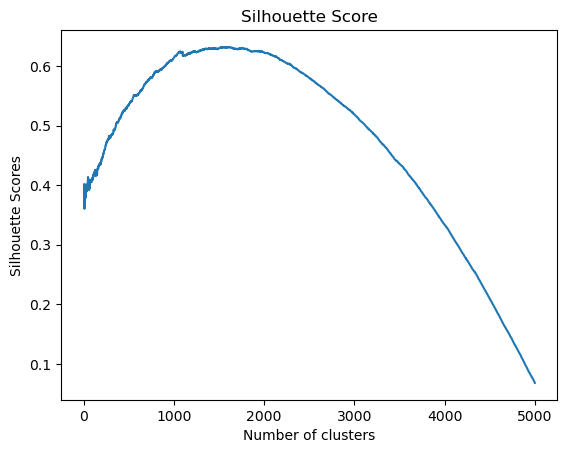

1609
0.631942


In [8]:
tsne = TSNE(n_components=2, random_state=42)
embedded_vectors = tsne.fit_transform(embeddings)

print("1.K-Means Clustering\n")
sil_score=[]
maxInd = 0
for i in range(2,5000):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto').fit(embedded_vectors)
    kmeans_labels = kmeans.labels_
    
    sil_score.append(silhouette_score(embedded_vectors, kmeans_labels, metric = 'euclidean'))
    if i !=2:
        if sil_score[i-2] >= sil_score[maxInd]:
            maxInd = i-2
    

plt.plot(range(2,5000),sil_score)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

print(maxInd)
print(sil_score[maxInd])

Sil Score for 0


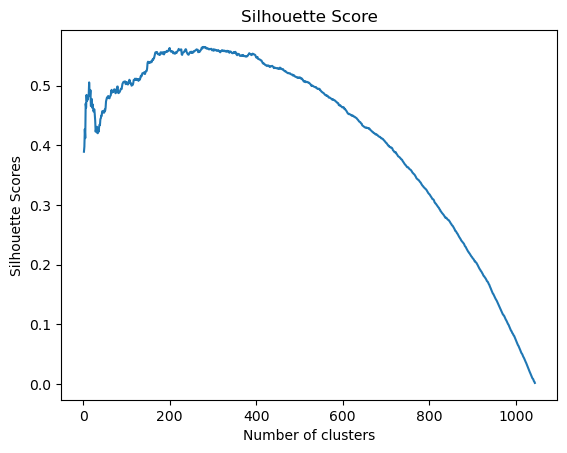

277
0.5646969
Sil Score for 1


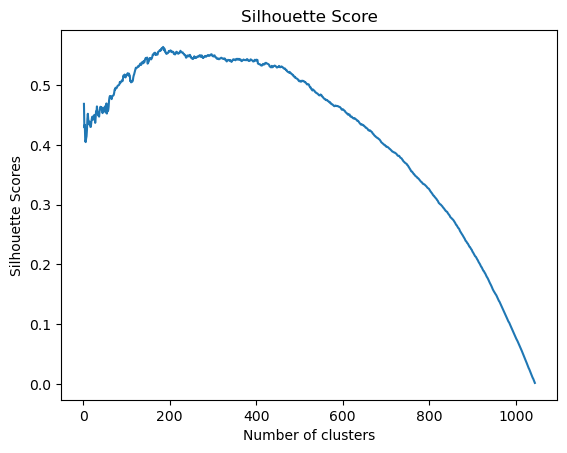

183
0.5636763
Sil Score for 2


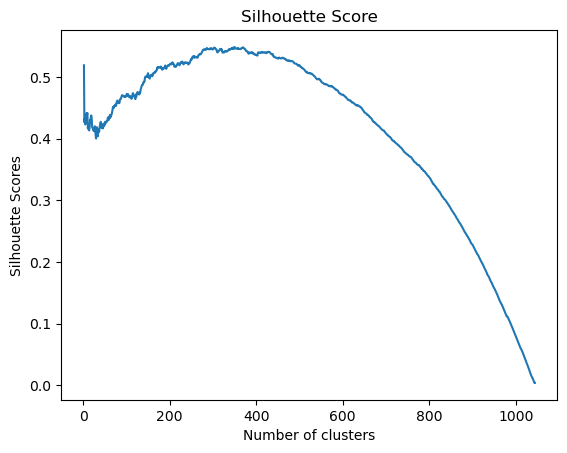

348
0.5484584
Sil Score for 3


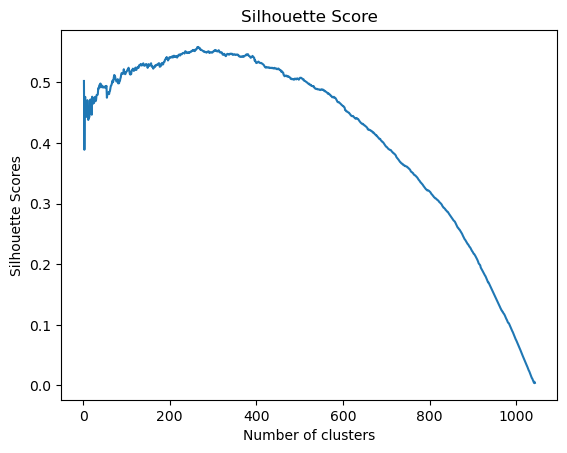

264
0.55856127
Sil Score for 4


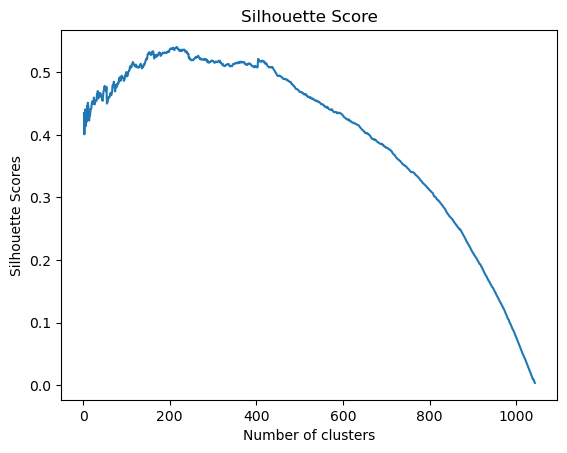

214
0.540805
[277, 183, 348, 264, 214]


In [3]:
tsne = TSNE(n_components=2, random_state=42)
warnings.filterwarnings('ignore')
mx_ind_list = []

for k in range(0, No_chunks):
    chunk_vectors = tsne.fit_transform(chunk_embeddings[k])

    print("Sil Score for "+str(k))
    sil_score=[]
    maxInd = 0
    for i in range(2,len(chunk_embeddings[k])):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto').fit(chunk_vectors)
        kmeans_labels = kmeans.labels_

        sil_score.append(silhouette_score(chunk_vectors, kmeans_labels, metric = 'euclidean'))
        if i !=2:
            if sil_score[i-2] >= sil_score[maxInd]:
                maxInd = i-2
    mx_ind_list.append(maxInd)


    plt.plot(range(2,len(chunk_embeddings[k])),sil_score)
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.show()

    print(maxInd)
    print(sil_score[maxInd])
print(mx_ind_list)

C:\Users\eanva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


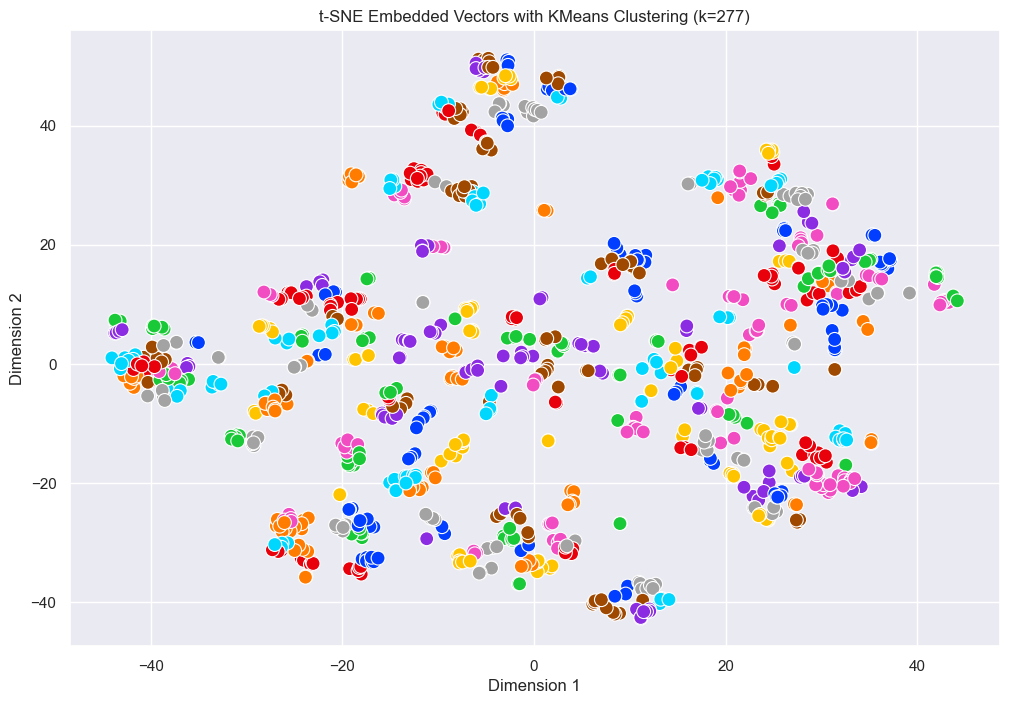

C:\Users\eanva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


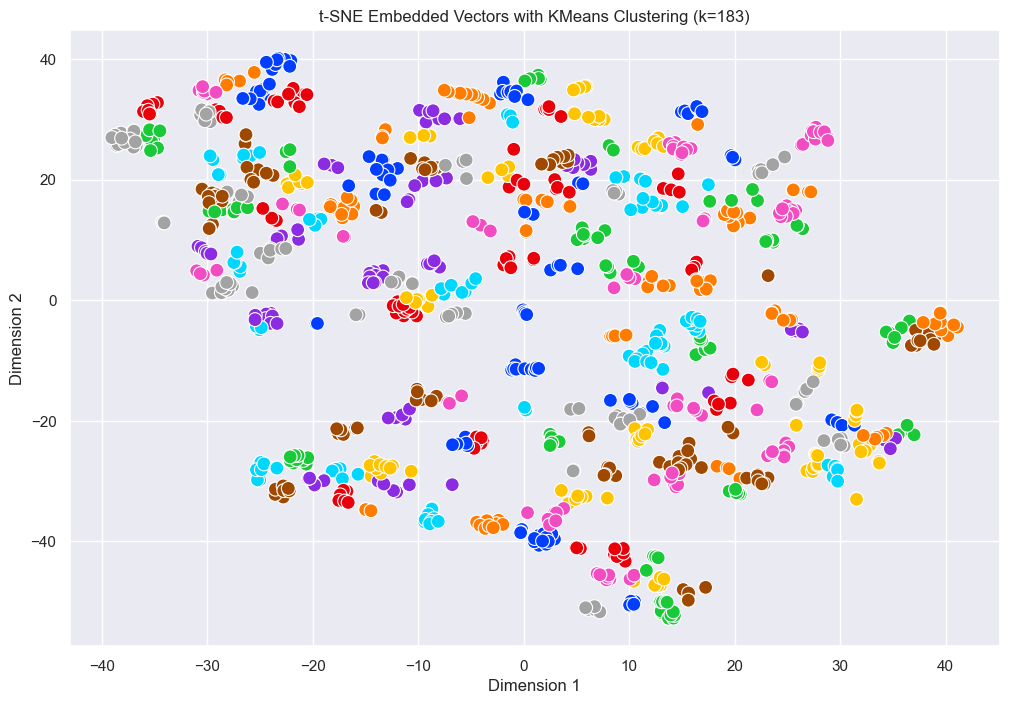

C:\Users\eanva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


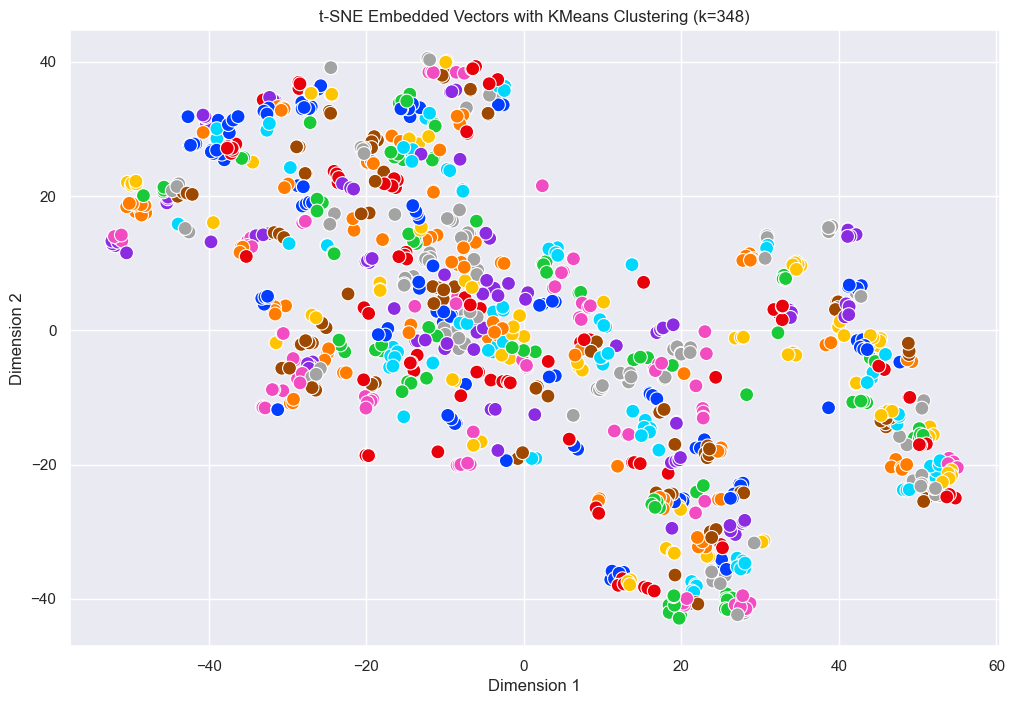

C:\Users\eanva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


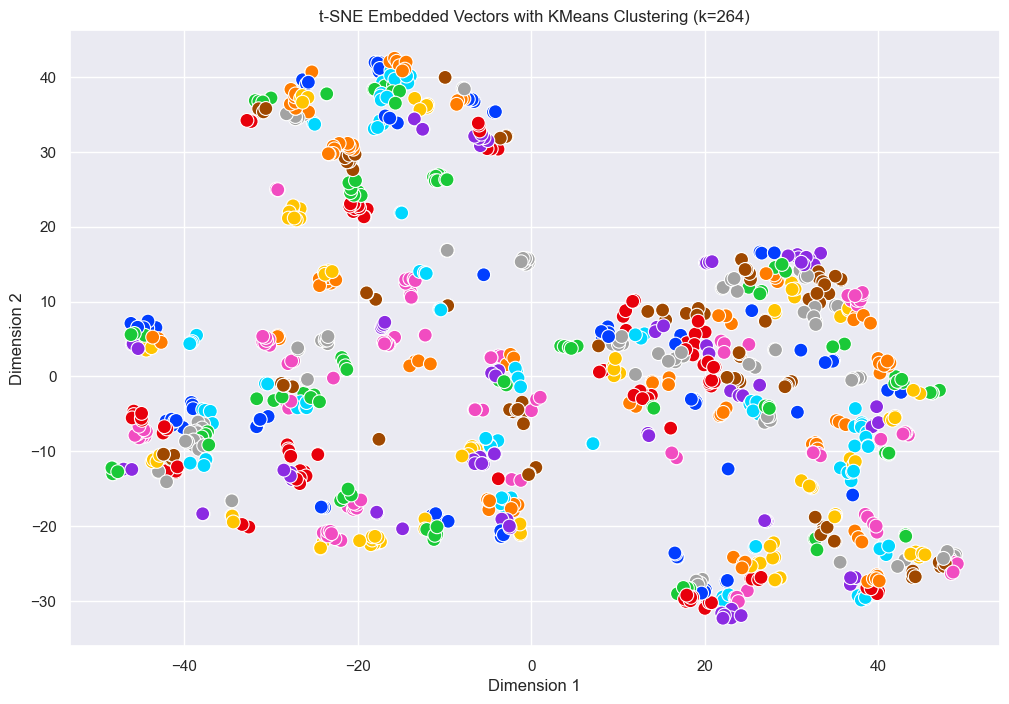

C:\Users\eanva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


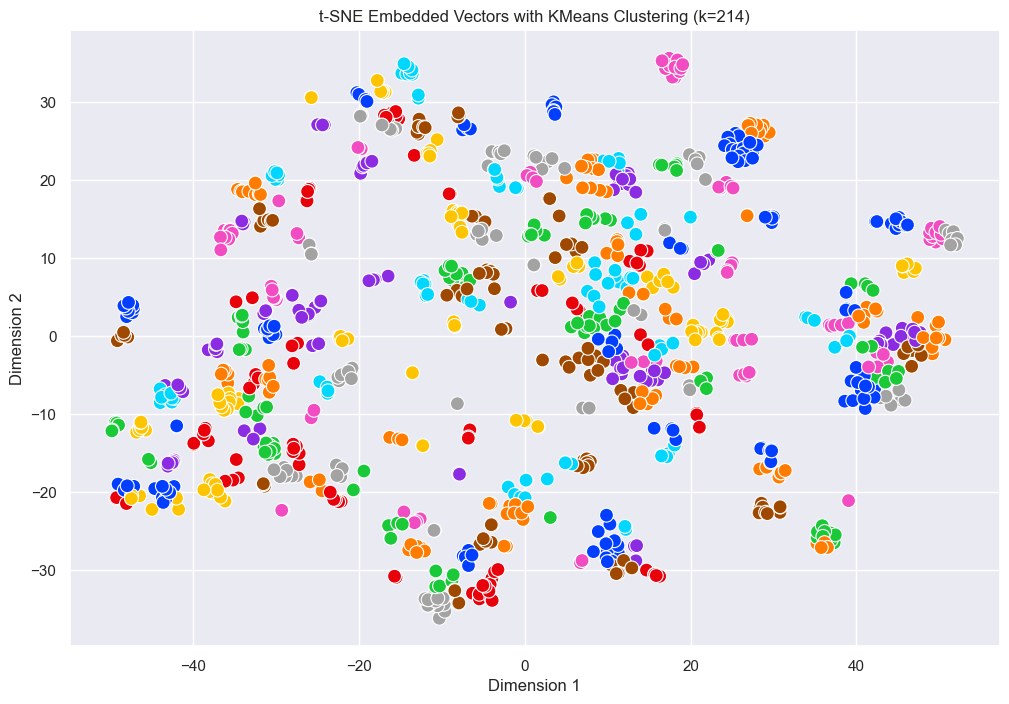

In [6]:
mx_ind_list = [277, 183, 348, 264, 214] ## DELETE ME

# Using t-SNE to embed the vectors into 2D
sorted_indexes = []
clusters = []

for k in range(0, No_chunks):
    tsne = TSNE(n_components=2, random_state=42)
    chunk_vectors = tsne.fit_transform(chunk_embeddings[k])
    sorted_indexes.append(np.argsort(chunk_embeddings[k]))

    # Performing KMeans clustering with k=12
    kmeans = KMeans(n_clusters=mx_ind_list[k], random_state=42)
    clusters.append(kmeans.fit_predict(chunk_vectors))

    # Extracting numbers from file names for labels
    #labels = [re.search(r'\d+', vector['input']).group() for vector in chunk_embeddings[0]]

    # Plotting the embedded vectors with cluster coloring
    sns.set()
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    sns.scatterplot(x=chunk_vectors[:, 0], y=chunk_vectors[:, 1], hue=clusters[k], palette='bright', legend=None, s=100)
    #for i, vec in enumerate(chunk_vectors):
        #plt.text(vec[0] + 0.02, vec[1] + 0.02, labels[i], fontsize=6)  # Adding labels
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('t-SNE Embedded Vectors with KMeans Clustering (k='+str(mx_ind_list[k])+')')
    #plt.legend(title='Cluster')
    plt.show()

In [7]:
cluster_indexes = [[] for _ in range(214)]

# Populate lists with indexes
for i, cluster in enumerate(clusters[4]):
    cluster_indexes[cluster].append(i)
    
for i in range(0,214):
    print("cluster",i,len(cluster_indexes[i]))

cluster 0 10
cluster 1 4
cluster 2 6
cluster 3 4
cluster 4 3
cluster 5 6
cluster 6 2
cluster 7 2
cluster 8 5
cluster 9 4
cluster 10 9
cluster 11 4
cluster 12 9
cluster 13 3
cluster 14 3
cluster 15 4
cluster 16 7
cluster 17 7
cluster 18 5
cluster 19 4
cluster 20 8
cluster 21 7
cluster 22 5
cluster 23 3
cluster 24 4
cluster 25 4
cluster 26 6
cluster 27 5
cluster 28 2
cluster 29 6
cluster 30 9
cluster 31 6
cluster 32 3
cluster 33 5
cluster 34 4
cluster 35 4
cluster 36 3
cluster 37 5
cluster 38 7
cluster 39 4
cluster 40 2
cluster 41 2
cluster 42 6
cluster 43 3
cluster 44 5
cluster 45 6
cluster 46 8
cluster 47 7
cluster 48 11
cluster 49 4
cluster 50 6
cluster 51 3
cluster 52 3
cluster 53 4
cluster 54 4
cluster 55 6
cluster 56 4
cluster 57 5
cluster 58 3
cluster 59 3
cluster 60 10
cluster 61 6
cluster 62 7
cluster 63 4
cluster 64 10
cluster 65 9
cluster 66 5
cluster 67 4
cluster 68 2
cluster 69 5
cluster 70 4
cluster 71 6
cluster 72 4
cluster 73 5
cluster 74 5
cluster 75 2
cluster 76 5
clust

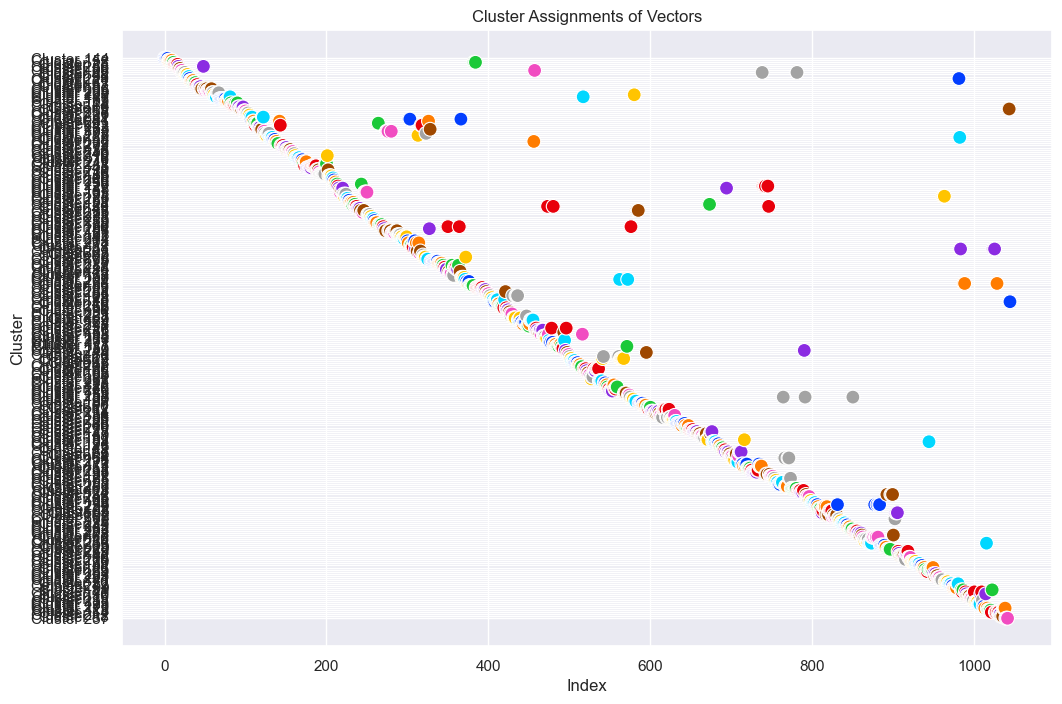

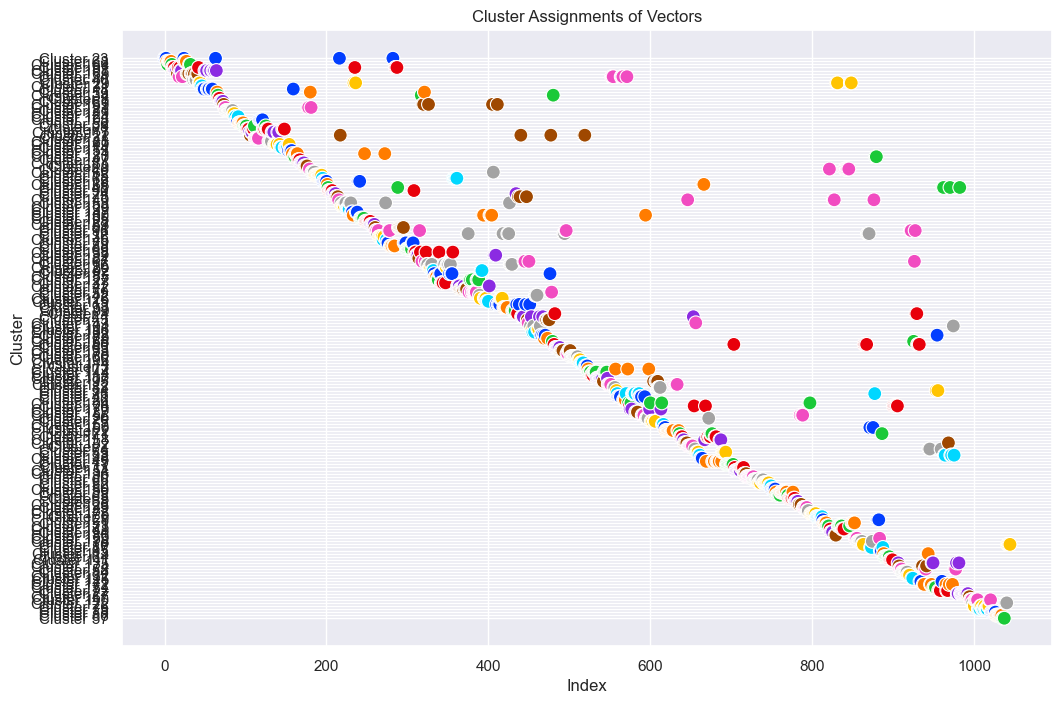

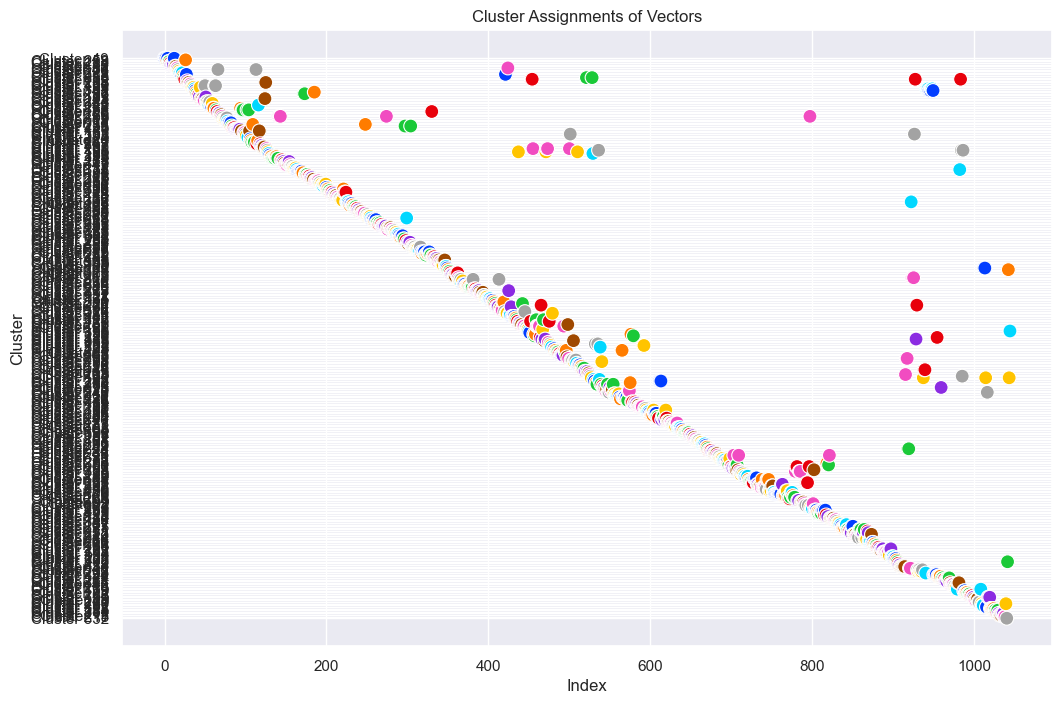

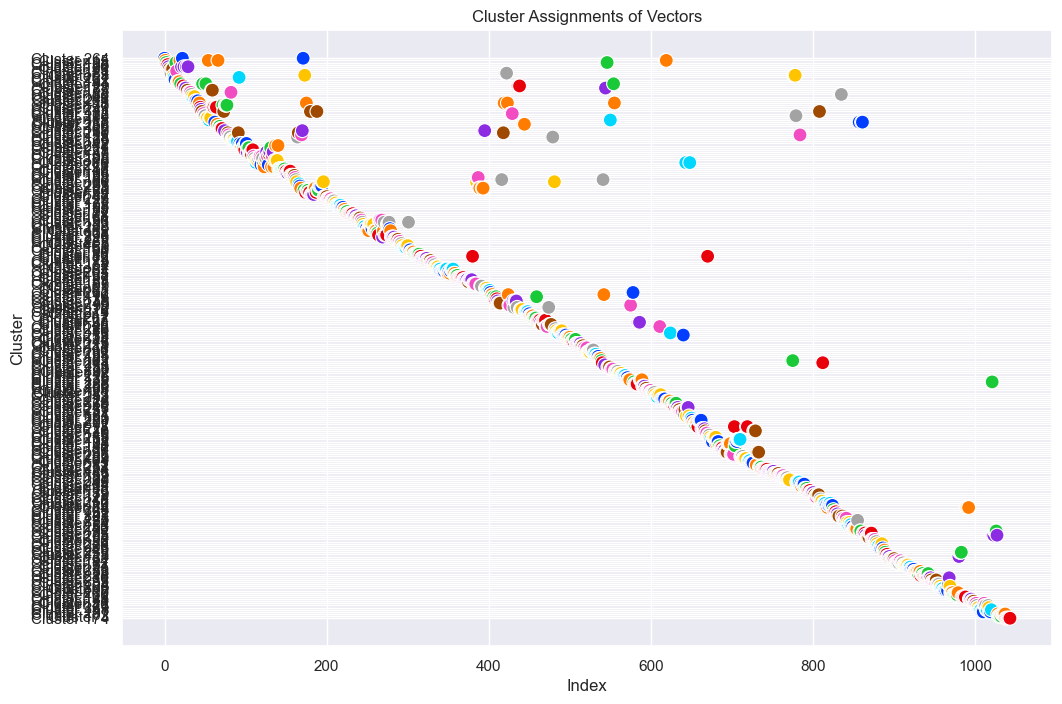

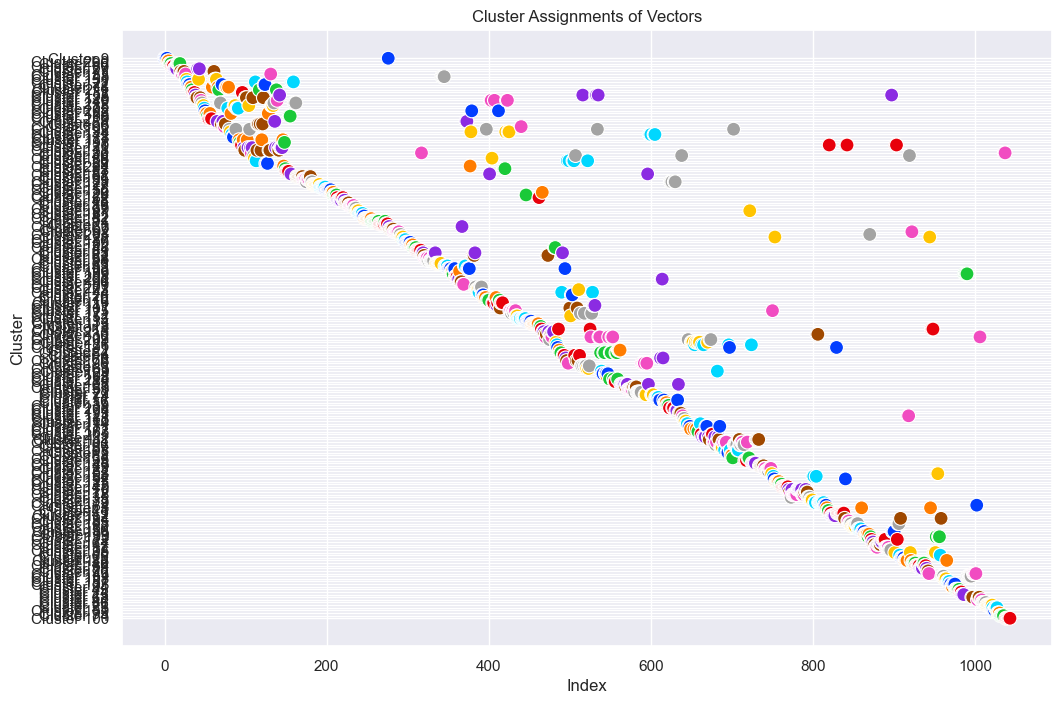

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the state from the previous code

# Create a list of cluster assignments for each vector
for k in range(0, No_chunks):
    cluster_labels = [f'Cluster {cluster + 1}' for cluster in clusters[k]]

    # Plotting the scatter plot
    sns.set()
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    sns.scatterplot(x=np.arange(len(chunk_embeddings[k])), y=cluster_labels, hue=cluster_labels, palette='bright', legend=None, s=100)
    plt.xlabel('Index')
    plt.ylabel('Cluster')
    plt.title('Cluster Assignments of Vectors')
    #plt.legend(title='Cluster')
    plt.show()

In [8]:
print(chunk_embeddings[0])

[[ 5.37705719e-01  7.36874521e-01  7.08179250e-02 ... -3.14219892e-01
  -2.64640152e-01  5.39753318e-01]
 [ 5.58191061e-01  7.64112175e-01  1.47231817e-01 ... -3.20014238e-01
  -2.53475249e-01  5.68730474e-01]
 [ 5.23132086e-01  7.68910587e-01  6.61231428e-02 ... -1.87447101e-01
  -2.44298980e-01  5.84310412e-01]
 ...
 [ 6.46631122e-01 -2.35018358e-02 -4.23672199e-02 ... -1.37088835e+00
   1.15125924e-02 -4.86008823e-04]
 [ 7.94122815e-01 -1.32157281e-02  3.64214540e-01 ... -1.21953809e+00
   1.18878312e-01 -1.91903502e-01]
 [ 4.49674606e-01  5.52664697e-02  1.07860804e-01 ... -5.09606823e-02
  -3.37897956e-01 -2.30781898e-01]]


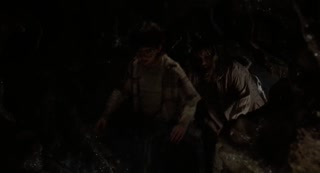

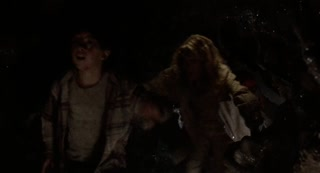

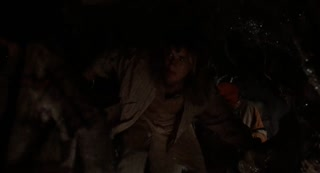

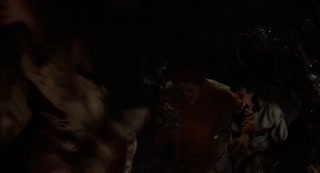

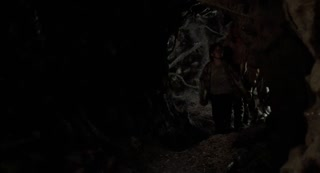

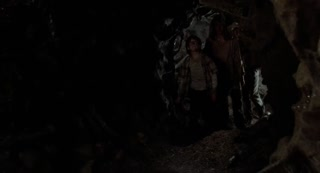

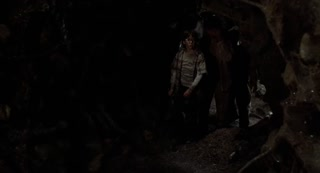

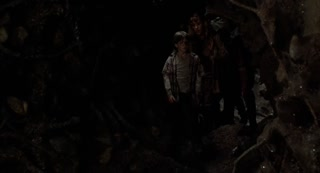

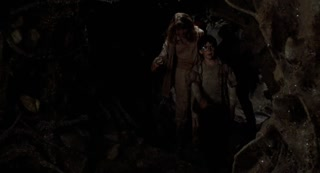

In [9]:
show_list = [1234,5049,786]
for i in cluster_indexes[12]:
    #print(embeddings[i])
    #print(i,sorted_indexes[0][i],chunk_movie_embeddings[0][i]["input"])
    image_path = image_root+chunk_movie_embeddings[4][i]["input"]
    # Display the image
    display(Image(filename=image_path))

# Film Description
<i>This section should cite and briefly describe the film.</i>

# Methods Summary
<i>This section should highlight methods you used in your exploratory analysis. You should include at least one clustering technique or develop another way to relate frames to other frames. you should also consider dimensionality reduction. 

# Hunches and Hypotheses
<i>This section should summarize the question that you asked about teh film taht could potentially be answered by exploratory analysis. You should ask at least three questions.</i>

<u>Q1. Which characters show up the most in which chunk?</u>

{0: {'Nick Szalinski': 127, 'Wayne Szalinski': 50, 'Ron Thompson': 56, 'Amy Szalinski': 29, 'Russ Thompson Jr': 70, 'Quark': 18, 'Russ Thompson Sr': 107, 'Gloria Forrester': 0, 'Auntie': 0, 'Mae Thompson': 21}, 1: {'Nick Szalinski': 70, 'Wayne Szalinski': 61, 'Ron Thompson': 75, 'Amy Szalinski': 73, 'Russ Thompson Jr': 77, 'Quark': 23, 'Russ Thompson Sr': 4, 'Gloria Forrester': 9, 'Auntie': 0, 'Mae Thompson': 10}, 2: {'Nick Szalinski': 36, 'Wayne Szalinski': 60, 'Ron Thompson': 57, 'Amy Szalinski': 39, 'Russ Thompson Jr': 13, 'Quark': 0, 'Russ Thompson Sr': 23, 'Gloria Forrester': 12, 'Auntie': 8, 'Mae Thompson': 14}, 3: {'Nick Szalinski': 15, 'Wayne Szalinski': 102, 'Ron Thompson': 27, 'Amy Szalinski': 57, 'Russ Thompson Jr': 38, 'Quark': 6, 'Russ Thompson Sr': 49, 'Gloria Forrester': 0, 'Auntie': 27, 'Mae Thompson': 44}, 4: {'Nick Szalinski': 28, 'Wayne Szalinski': 79, 'Ron Thompson': 22, 'Amy Szalinski': 31, 'Russ Thompson Jr': 18, 'Quark': 18, 'Russ Thompson Sr': 8, 'Gloria Forrest

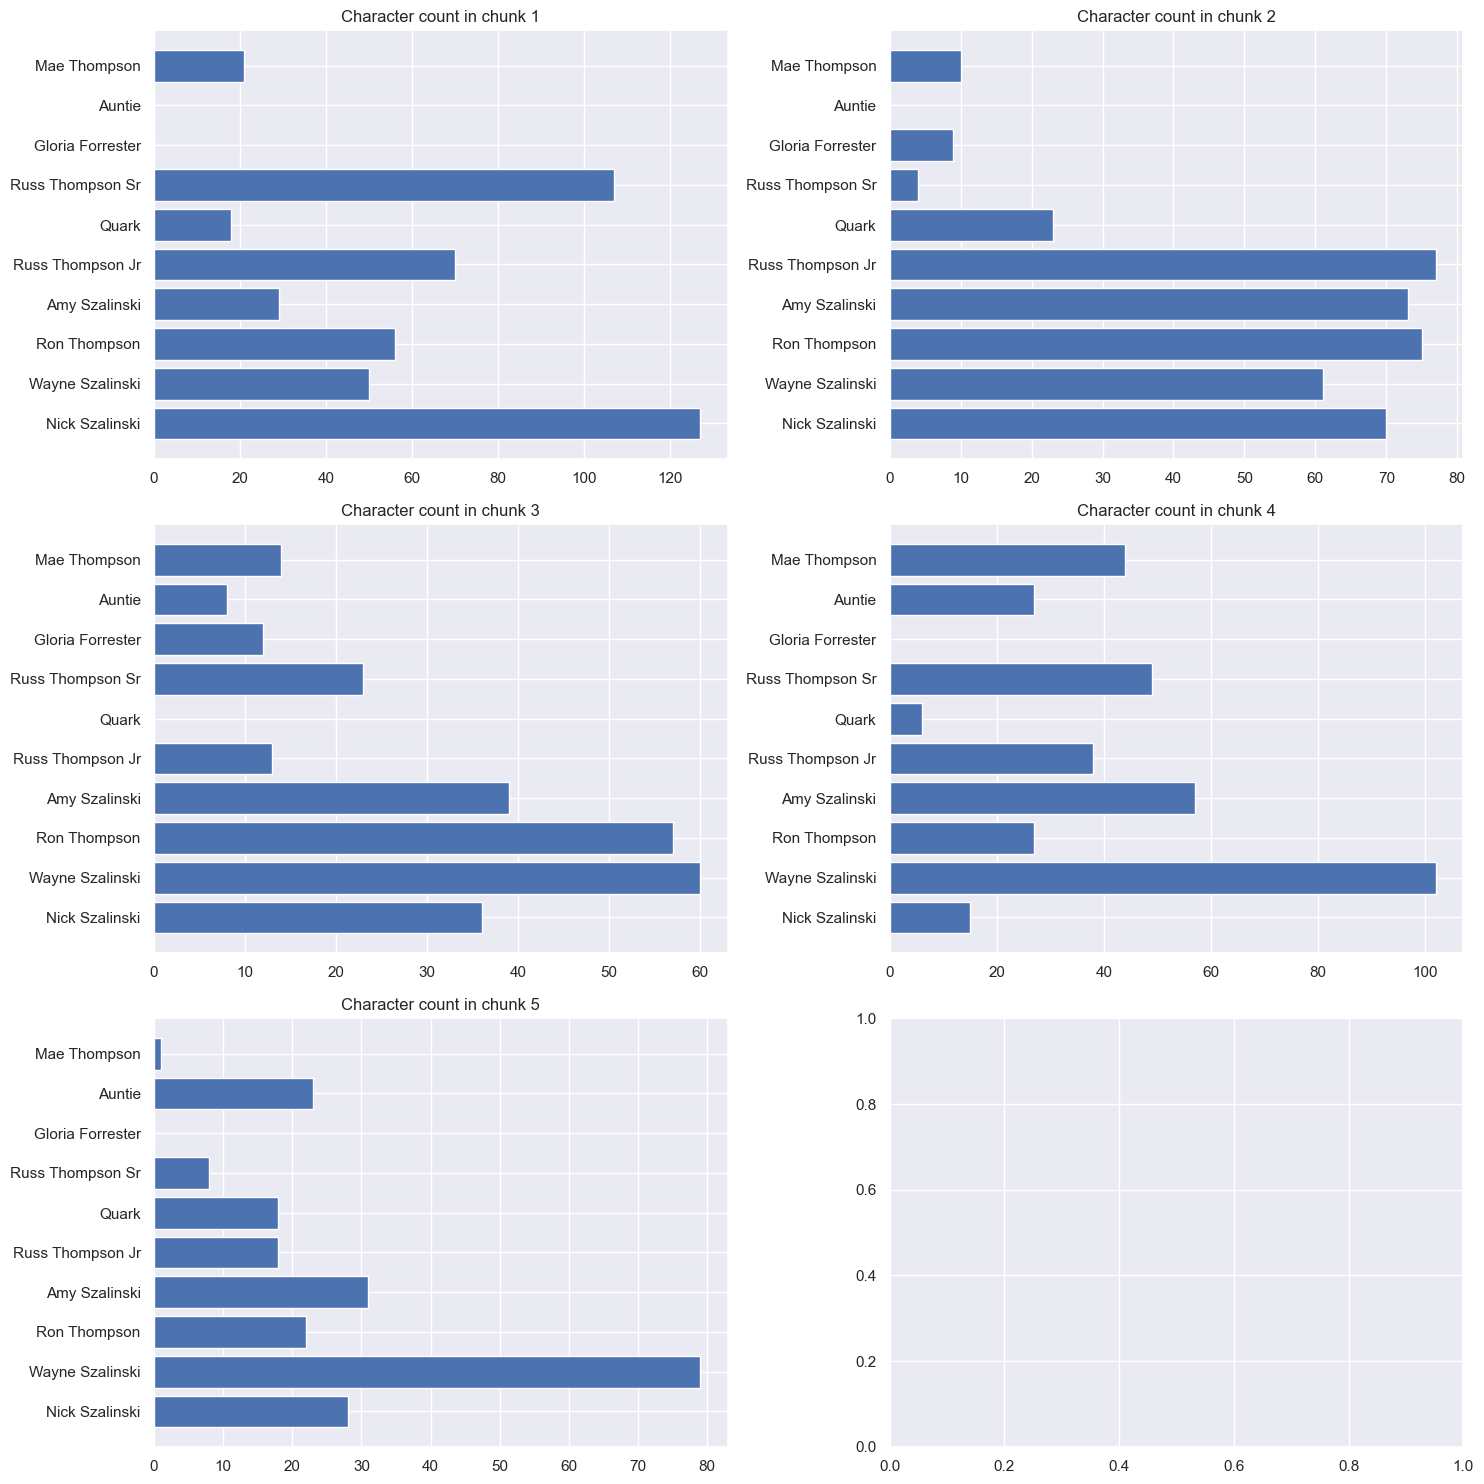

Nick Szalinski: [127, 70, 36, 15, 28]


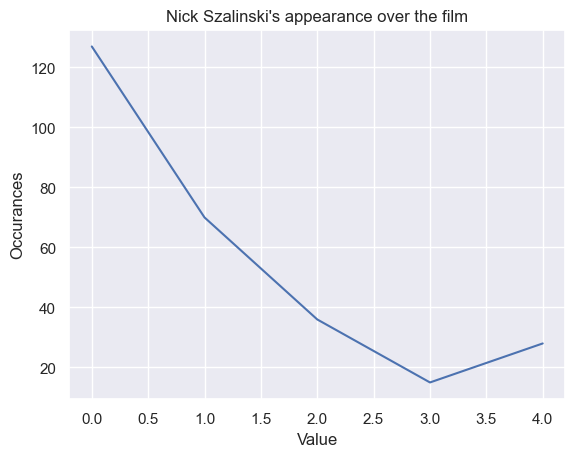

Wayne Szalinski: [50, 61, 60, 102, 79]


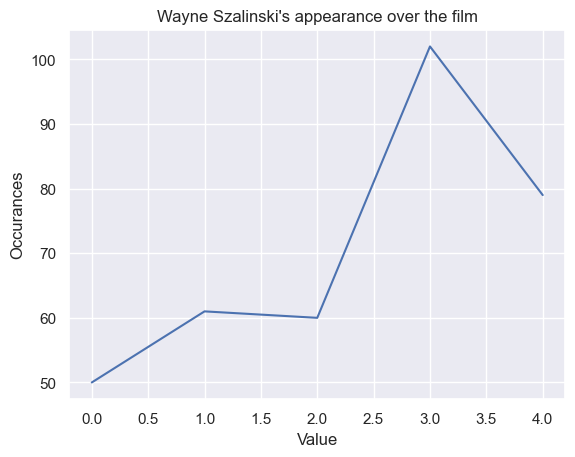

Ron Thompson: [56, 75, 57, 27, 22]


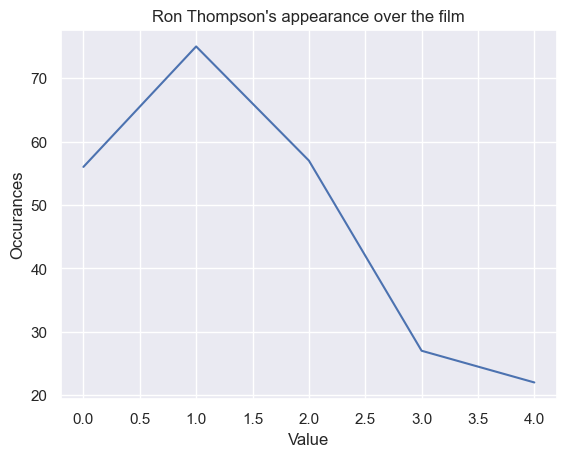

Amy Szalinski: [29, 73, 39, 57, 31]


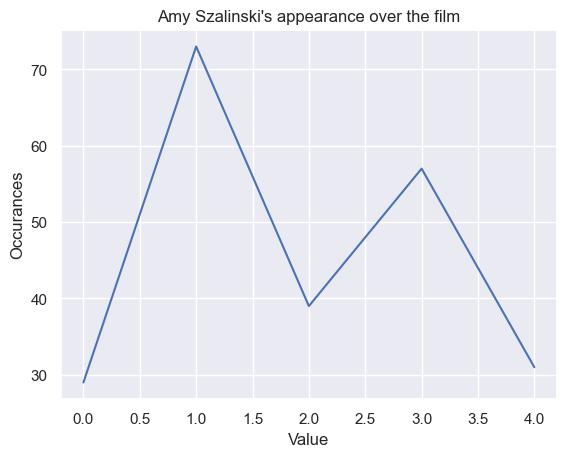

Russ Thompson Jr: [70, 77, 13, 38, 18]


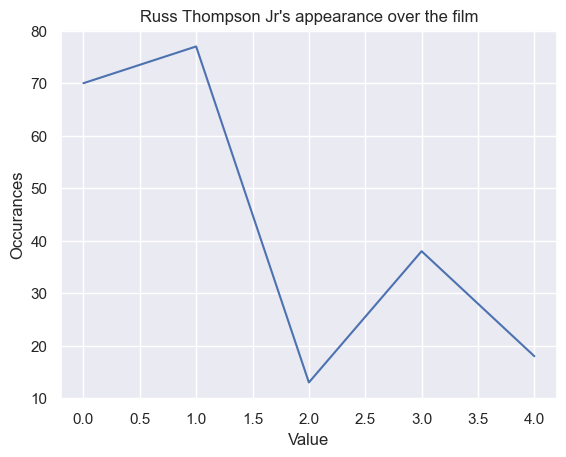

Quark: [18, 23, 0, 6, 18]


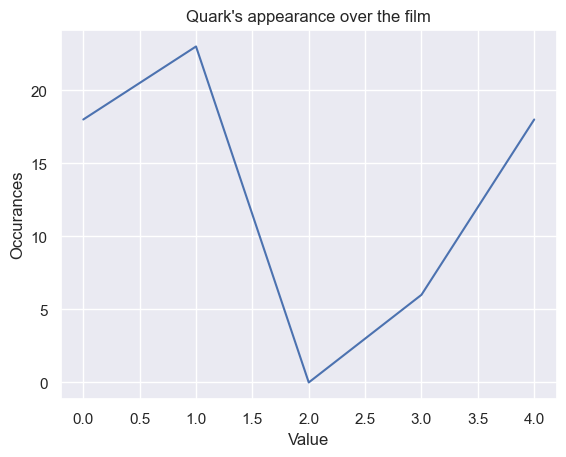

Russ Thompson Sr: [107, 4, 23, 49, 8]


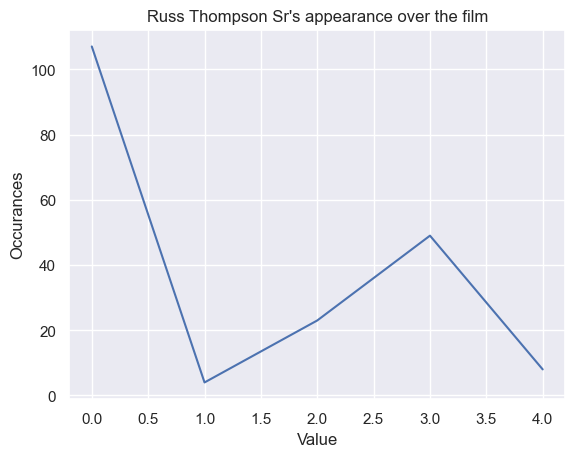

Gloria Forrester: [0, 9, 12, 0, 0]


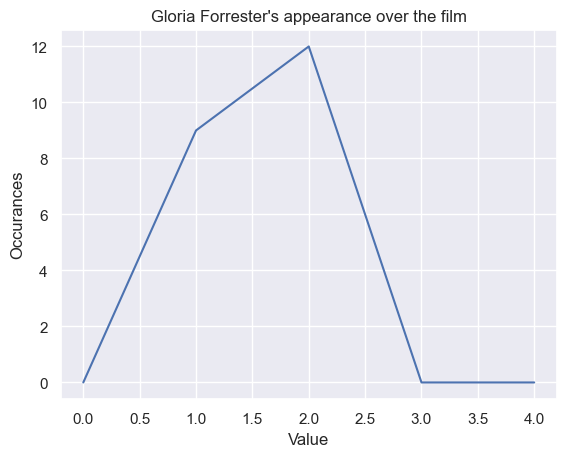

Auntie: [0, 0, 8, 27, 23]


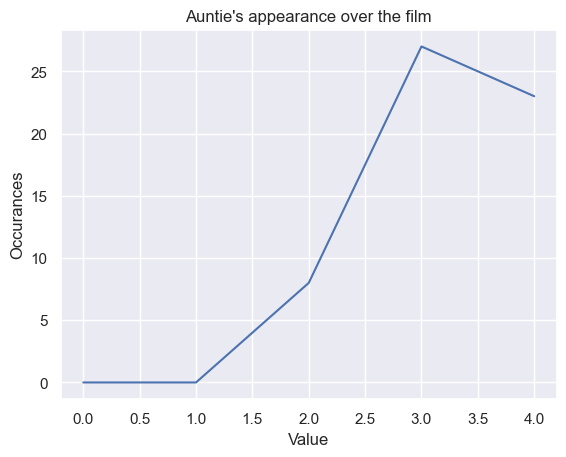

Mae Thompson: [21, 10, 14, 44, 1]


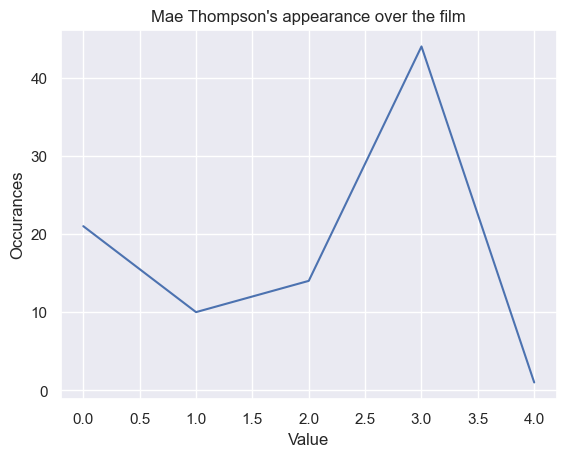

In [51]:
import numpy as np
import matplotlib.pyplot as plt

'''GOAL: 
* find which clusters the main characters appear the most in
* find which characters show up the most in the film

Aglo:
1. provide images / embeddings of main characters
2. write func to compare embedding with provided image
3. loop through all clusters and compare each to the main characters
'''

image_root = 'thumbnails_folder2large/'
goal_distance = 12.25

def euclidean_distance(array1, array2):
    # Convert the arrays to NumPy arrays
    array1_np = np.array(array1)
    array2_np = np.array(array2)
    
    # Calculate the Euclidean distance
    distance = np.linalg.norm(array1_np - array2_np)
    return distance

def displayImage(index):
    # Replace 'image_path.jpg' with the path to your image file
    image_path = image_root+moive_embeddings[index]["input"]
    print(image_path)
    # Display the image
    display(Image(filename=image_path))

#provide images / embeddings of main characters
characters = {'Nick Szalinski': 793, 'Wayne Szalinski': 1595, 'Ron Thompson': 861, 
              'Amy Szalinski': 1423, 'Russ Thompson Jr': 1424, 'Quark': 4826, 
              'Russ Thompson Sr': 2958, 'Gloria Forrester': 2984, 'Auntie': 3230, 'Mae Thompson': 3448 }

character_chunks = {}
#loop through each character
for chunk in range(0, No_chunks):
    # print('==============================================================')
    # print(f'                       {chunk}')
    # print('==============================================================')
    # store character appearances per chunk
    character_appearances = {}
    for character in characters:
        character_index = characters[character]
        target = moive_embeddings[character_index]

        # get distances for each embedding
        distances = {}
        # for emb in moive_embeddings:
        for emb in chunk_movie_embeddings[chunk]:
            current_dist = euclidean_distance(emb["embedding"], target["embedding"])
            if current_dist < goal_distance:
                distances[moive_embeddings.index(emb)] = current_dist
        
        # sort it
        distances = dict(sorted(distances.items(), key=lambda item: item[1]))
        
        # print out analysis as it goes along
        # print('==============================================================')
        # print(f'TARGET CHARACTER: {character}')
        # print(f'Displays {len(distances)} times within the film')
        # displayImage(character_index)
        character_appearances[character] = len(distances)
    character_chunks[chunk] = character_appearances
print(character_chunks)


fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

for i, (chunk, characters) in enumerate(character_chunks.items()):
    characters, counts = zip(*characters.items())
    axs[i].barh(characters, counts)
    axs[i].set_title(f'Character count in chunk {chunk + 1}')

plt.tight_layout()
plt.show()

appearances_over_chunks = {}
for character in character_chunks[0]:
    character_over_chunk = [character_chunks[chunk][character] for chunk in range(0, No_chunks)]
    appearances_over_chunks[character] = character_over_chunk

for character in appearances_over_chunks:
    print(f'{character}: {appearances_over_chunks[character]}')
    plt.plot(appearances_over_chunks[character])
    plt.title(f'{character}\'s appearance over the film')
    plt.ylabel('Occurances')
    plt.xlabel('Value')
    plt.show()



<u>Q2. Possible theme detection</u>

<u> Q3. Each kid is more likely to show up with another kid than with an adult?</u>

# Results and Interpretations

<i>This section should include a summary of your findings. Describe the extent and results of your goal in answering questions.</i>

# Reflection
<i>Reflect on your process of analysis. What worked well and did not work well? Describe the limitations of the work and describe what you would work on with more time.</i>